In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Objective Function

In [2]:
f = lambda x: (x-5)**2 + 20*np.sin(5*x)

In [3]:
x = np.arange(-5,15,0.01)
y = list(map(f,x))

In [4]:
plt.style.use('seaborn')

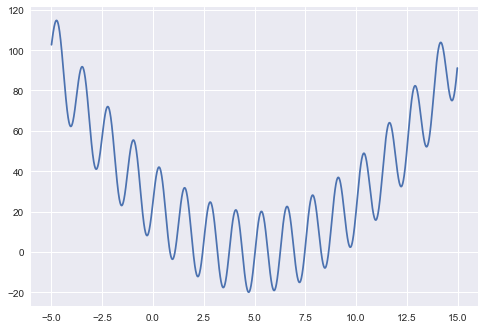

In [5]:
plt.plot(x,y)
plt.show()

### Exact Solver

In [6]:
x_list = np.arange(3.0,6.0,0.01)
y_list = list(map(f,x_list))

In [7]:
x_best = x_list[np.argmin(y_list)]

In [8]:
x_best

4.7099999999999635

### Simulated Annealing

In [93]:
def generate_neighbor(x):
    return x + 2*(np.random.rand() - 0.5)

In [95]:
def accept_prob(x, new_x, t):
    deltaE = abs(f(new_x) - f(x))
    Prob = np.exp(-deltaE/t)
    return Prob

In [94]:
def annealing(max_iter):
    x = 0
    cost = []
    solution = []
    frac = 0.99
    t = 5000
    n = 0
    while n < max_iter:
        new_x = generate_neighbor(x)
        if f(new_x) <= f(x):
            x = new_x
        else:
            prob = accept_prob(x, new_x, t)
            r = np.random.rand()
            if r < prob:
                x = new_x
        cost.append(f(x))
        solution.append(x)
        t = t*frac
        n = n+1
    return cost, solution, x

In [98]:
cost, solution, x = annealing(1500)
x

4.713705214674965

Text(0.5, 1.0, 'Costs')

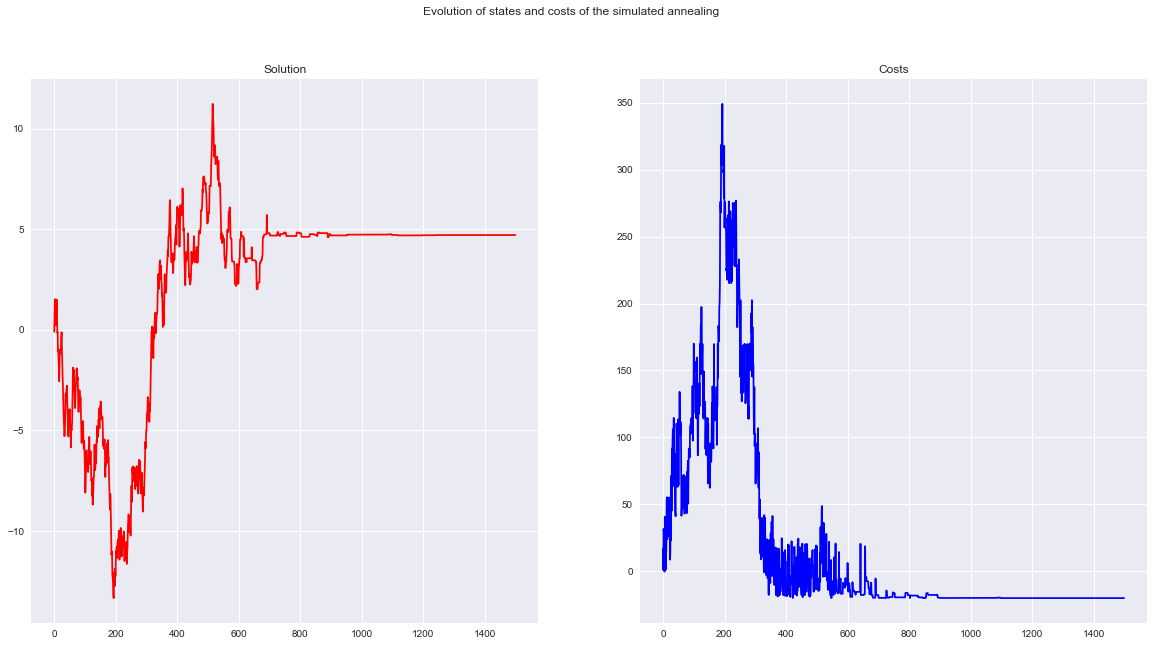

In [99]:
plt.figure(figsize = (20,10))
plt.suptitle("Evolution of states and costs of the simulated annealing")
plt.subplot(121)
plt.plot(solution, 'r')
plt.title("Solution")
plt.subplot(122)
plt.plot(cost, 'b')
plt.title("Costs")

In [100]:
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib import rc
from IPython.display import HTML

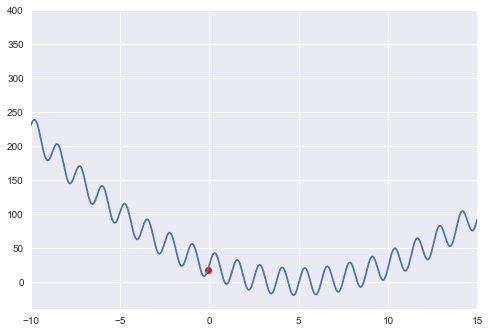

In [101]:
fig, ax = plt.subplots()
line, = plt.plot([0], [0], 'ro')

x = np.arange(-10,15,0.01)
y = list(map(f,x))
l = plt.plot(x,y)

ax = plt.axis([-10,15,-40,400])

def update(frame):
    x = solution[frame]
    y = cost[frame]
    line.set_data(x, y)
    return line,

ani = FuncAnimation(fig, update, frames=np.arange(0, len(cost), 1),interval=10, blit = True, repeat=True)

In [102]:
ani.save('test.gif', writer = PillowWriter(fps=20))
plt.show()